In [1]:
%pylab inline
from datetime import date
from app import create_app
from app.instrument import Instrument
from app.analysis import Quote
with create_app().app_context():
    quote = Quote([b.symbol for b in Instrument.find_bonds()], 100)
f'from {quote.start.date()} to {date.today()}'

Populating the interactive namespace from numpy and matplotlib


'from 2019-02-26 to 2019-06-06'

In [2]:
stat = quote.statistics(21)
stat = stat[(stat['drawdown'] < 4) & (stat['21-mean'] > 0.4)]
stat

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
MUB,50,1.059900,0.389738,2.265583,0.409122
VTEB,50,1.080568,0.399310,2.263031,0.333713
VCIT,50,1.169885,0.649239,1.529435,0.502684
LQD,50,1.328175,0.855158,1.346251,0.743382
VCLT,50,1.859724,1.259648,1.335934,1.036422
BLV,50,2.071630,1.502998,1.260622,1.732519
VCSH,50,0.558881,0.305553,1.250076,0.282660
PGX,50,0.697043,0.417117,1.246953,1.237112
BND,50,0.956636,0.637970,1.222187,0.703167


In [3]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2)

['MUB', 'VTEB'] -2.4011403132763243 1.9417650504716741 0.185708812622997 -4.528614176370995
['MUB', 'VCIT'] -2.7874388778732424 0.7796275993452015 0.22795142422600606 -3.7950179014444503
['MUB', 'LQD'] -2.988228005343438 0.33548042307491466 0.28812597108692173 -3.611834399505274
['MUB', 'VCLT'] -3.06653481040454 0.17359597537277116 0.36138611031545476 -3.6015168960927655
['MUB', 'PGX'] -3.854408206373245 -0.7534304179934752 0.41155855302381983 -3.5125363414035897


['MUB', 'PGX']

In [4]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2, ['BND'])

['BND', 'MUB'] -1.7866842438887982 1.4230137762137165 0.2780722541009837 -3.4877702742034984
['BND', 'PGX'] -1.9143108147259762 0.06976018232304426 0.48506972024346484 -2.4691407172924853


['BND', 'PGX']

In [5]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(21, 2, ['PGX'])

['PGX', 'MUB'] -3.854408206373245 -0.7534304179934752 0.41155855302381983 -3.5125363414035897


['PGX', 'MUB']

In [6]:
quote.setup_mask(['PGX', 'MUB'])
quote.find_optimal_ratio(21, 1)

/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(Symbols
 PGX    0.475018
 MUB    0.524982
 dtype: float64, 0.8875, 0.2249)

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,50.0,0.884587,0.225186,0.420316,0.734339,0.898459,1.059220,1.278754,3.142605,0.337480
MUB,50.0,1.059900,0.389738,0.256944,0.784552,1.121005,1.350647,1.685346,2.265583,0.409122
PGX,50.0,0.697043,0.417117,-0.362674,0.450043,0.633834,0.992653,1.719726,1.246953,1.237112


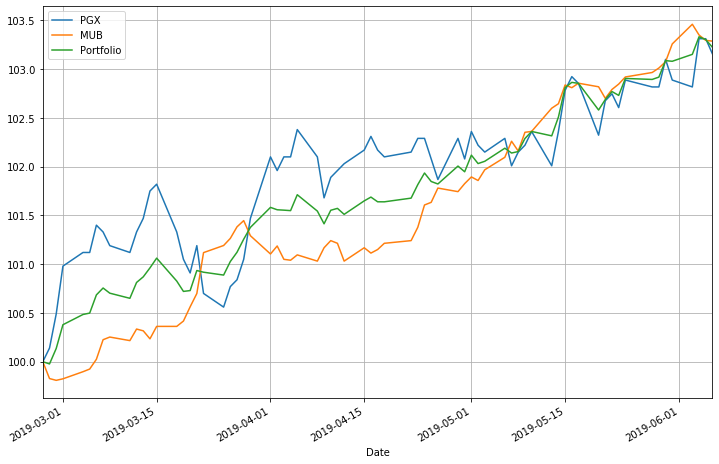

In [7]:
quote.graph(21, {'MUB': .52, 'PGX': .48})